In [37]:
# Install required packages
%pip install nixtla pandas numpy matplotlib python-dotenv


You should consider upgrading via the '/Users/martinliu/.pyenv/versions/3.9.10/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dotenv import load_dotenv
from nixtla import NixtlaClient

# Load environment variables
load_dotenv()

print("Libraries imported successfully!")


Libraries imported successfully!


In [39]:
# Initialize the TimeGPT client with API key from environment
api_key = os.getenv('TIME_GPT_API_KEY')

if not api_key:
    raise ValueError("TIME_GPT_API_KEY not found in environment variables. Please check your .env file.")

nixtla_client = NixtlaClient(api_key=api_key)

print("TimeGPT client initialized successfully!")
print(f"API Key loaded: {'*' * (len(api_key) - 8) + api_key[-8:]}")


TimeGPT client initialized successfully!
API Key loaded: ******************************************************************************XRB7XGau


In [40]:
# Validate the API key
try:
    validation_result = nixtla_client.validate_api_key()
    print("✅ API Key is valid!")
    print(f"Validation result: {validation_result}")
except Exception as e:
    print(f"❌ API Key validation failed: {e}")


INFO:nixtla.nixtla_client:Happy Forecasting! :)


✅ API Key is valid!
Validation result: True


In [41]:
# Generate sample energy market data
def generate_energy_market_data(days=365):
    """Generate synthetic energy market data with realistic patterns"""
    
    # Create date range
    start_date = datetime.now() - timedelta(days=days)
    dates = pd.date_range(start=start_date, periods=days*24, freq='H')
    
    # Generate energy prices with realistic patterns
    np.random.seed(42)
    
    # Base price with trend
    base_price = 0.08 + np.linspace(0, 0.02, len(dates))
    
    # Daily seasonality (higher during day, lower at night)
    hours = dates.hour
    daily_pattern = 0.02 * np.sin(2 * np.pi * (hours - 6) / 24)
    
    # Weekly seasonality (higher on weekdays)
    weekdays = dates.weekday
    weekly_pattern = 0.01 * (weekdays < 5).astype(float)
    
    # Random noise
    noise = np.random.normal(0, 0.005, len(dates))
    
    # Combine all components
    energy_prices = base_price + daily_pattern + weekly_pattern + noise
    
    # Ensure prices are positive
    energy_prices = np.maximum(energy_prices, 0.01)
    
    # Create DataFrame in TimeGPT format
    df = pd.DataFrame({
        'ds': dates,
        'y': energy_prices,
        'unique_id': 'energy_price'
    })
    
    return df

# Generate the data
energy_data = generate_energy_market_data(days=90)

print(f"Generated {len(energy_data)} data points")
print("\nFirst 5 rows:")
print(energy_data.head())

print("\nData info:")
print(energy_data.info())


Generated 2160 data points

First 5 rows:
                          ds         y     unique_id
0 2025-03-23 16:16:24.824306  0.092484  energy_price
1 2025-03-23 17:16:24.824306  0.084494  energy_price
2 2025-03-23 18:16:24.824306  0.083257  energy_price
3 2025-03-23 19:16:24.824306  0.082467  energy_price
4 2025-03-23 20:16:24.824306  0.068866  energy_price

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         2160 non-null   datetime64[ns]
 1   y          2160 non-null   float64       
 2   unique_id  2160 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 50.8+ KB
None


/var/folders/mq/1w_tgsq53vv0rgs3pzk14wqc0000gn/T/ipykernel_47488/3700909682.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start=start_date, periods=days*24, freq='H')


In [42]:
## 5. Export Historical Data to CSV

# Export the generated historical data to CSV for external analysis
csv_filename = 'energy_market_historical_data.csv'

try:
    # Export to CSV with timestamp formatting
    energy_data.to_csv(csv_filename, index=False)
    print(f"✅ Historical data exported successfully!")
    print(f"📁 File saved as: {csv_filename}")
    print(f"📊 Records exported: {len(energy_data):,}")
    
    # Show file size
    import os
    file_size = os.path.getsize(csv_filename)
    file_size_mb = file_size / (1024 * 1024)
    print(f"💾 File size: {file_size_mb:.2f} MB")
    
    # Preview first few lines of the CSV
    print(f"\n📋 CSV Preview (first 5 rows):")
    print(energy_data.head().to_string(index=False))
    
    # Show data range
    print(f"\n📅 Data Range:")
    print(f"From: {energy_data['ds'].min()}")
    print(f"To:   {energy_data['ds'].max()}")
    print(f"Duration: {(energy_data['ds'].max() - energy_data['ds'].min()).days} days")
    
except Exception as e:
    print(f"❌ Error exporting data: {e}")


✅ Historical data exported successfully!
📁 File saved as: energy_market_historical_data.csv
📊 Records exported: 2,160
💾 File size: 0.12 MB

📋 CSV Preview (first 5 rows):
                        ds        y    unique_id
2025-03-23 16:16:24.824306 0.092484 energy_price
2025-03-23 17:16:24.824306 0.084494 energy_price
2025-03-23 18:16:24.824306 0.083257 energy_price
2025-03-23 19:16:24.824306 0.082467 energy_price
2025-03-23 20:16:24.824306 0.068866 energy_price

📅 Data Range:
From: 2025-03-23 16:16:24.824306
To:   2025-06-21 15:16:24.824306
Duration: 89 days


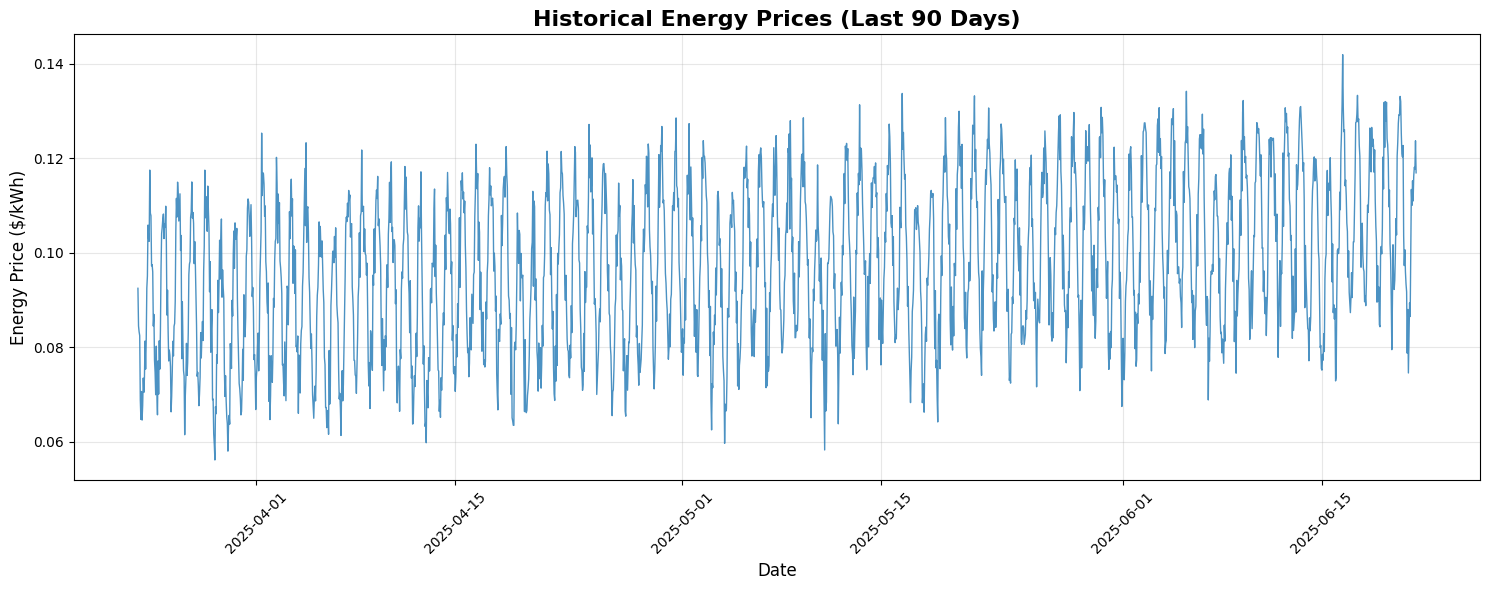

Energy Price Statistics:
Mean: $0.0974/kWh
Std:  $0.0167/kWh
Min:  $0.0561/kWh
Max:  $0.1420/kWh


In [43]:
# Plot the historical data
plt.figure(figsize=(15, 6))
plt.plot(energy_data['ds'], energy_data['y'], linewidth=1, alpha=0.8)
plt.title('Historical Energy Prices (Last 90 Days)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Energy Price ($/kWh)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show basic statistics
print("Energy Price Statistics:")
print(f"Mean: ${energy_data['y'].mean():.4f}/kWh")
print(f"Std:  ${energy_data['y'].std():.4f}/kWh")
print(f"Min:  ${energy_data['y'].min():.4f}/kWh")
print(f"Max:  ${energy_data['y'].max():.4f}/kWh")


In [44]:
# Generate forecast for next 24 hours
horizon = 24  # Forecast 24 hours ahead

print(f"Generating {horizon}-hour forecast using TimeGPT...")

try:
    # Generate forecast with confidence intervals
    forecast_df = nixtla_client.forecast(
        df=energy_data,
        h=horizon,
        time_col='ds',
        target_col='y',
        level=[80, 95]  # 80% and 95% confidence intervals
    )
    
    print("✅ Forecast generated successfully!")
    print(f"\nForecast shape: {forecast_df.shape}")
    print(f"Forecast columns: {list(forecast_df.columns)}")
    print("\nFirst 5 forecast points:")
    print(forecast_df.head())
    
except Exception as e:
    print(f"❌ Forecast generation failed: {e}")
    forecast_df = None


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...


Generating 24-hour forecast using TimeGPT...


INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


✅ Forecast generated successfully!

Forecast shape: (24, 7)
Forecast columns: ['unique_id', 'ds', 'TimeGPT', 'TimeGPT-hi-80', 'TimeGPT-hi-95', 'TimeGPT-lo-80', 'TimeGPT-lo-95']

First 5 forecast points:
      unique_id                         ds   TimeGPT  TimeGPT-hi-80  \
0  energy_price 2025-06-21 16:16:24.824306  0.114012       0.119142   
1  energy_price 2025-06-21 17:16:24.824306  0.110416       0.117053   
2  energy_price 2025-06-21 18:16:24.824306  0.102648       0.107148   
3  energy_price 2025-06-21 19:16:24.824306  0.098439       0.104035   
4  energy_price 2025-06-21 20:16:24.824306  0.096799       0.102990   

   TimeGPT-hi-95  TimeGPT-lo-80  TimeGPT-lo-95  
0       0.122087       0.108883       0.105938  
1       0.120972       0.103779       0.099860  
2       0.112089       0.098148       0.093207  
3       0.111225       0.092844       0.085654  
4       0.108476       0.090607       0.085121  


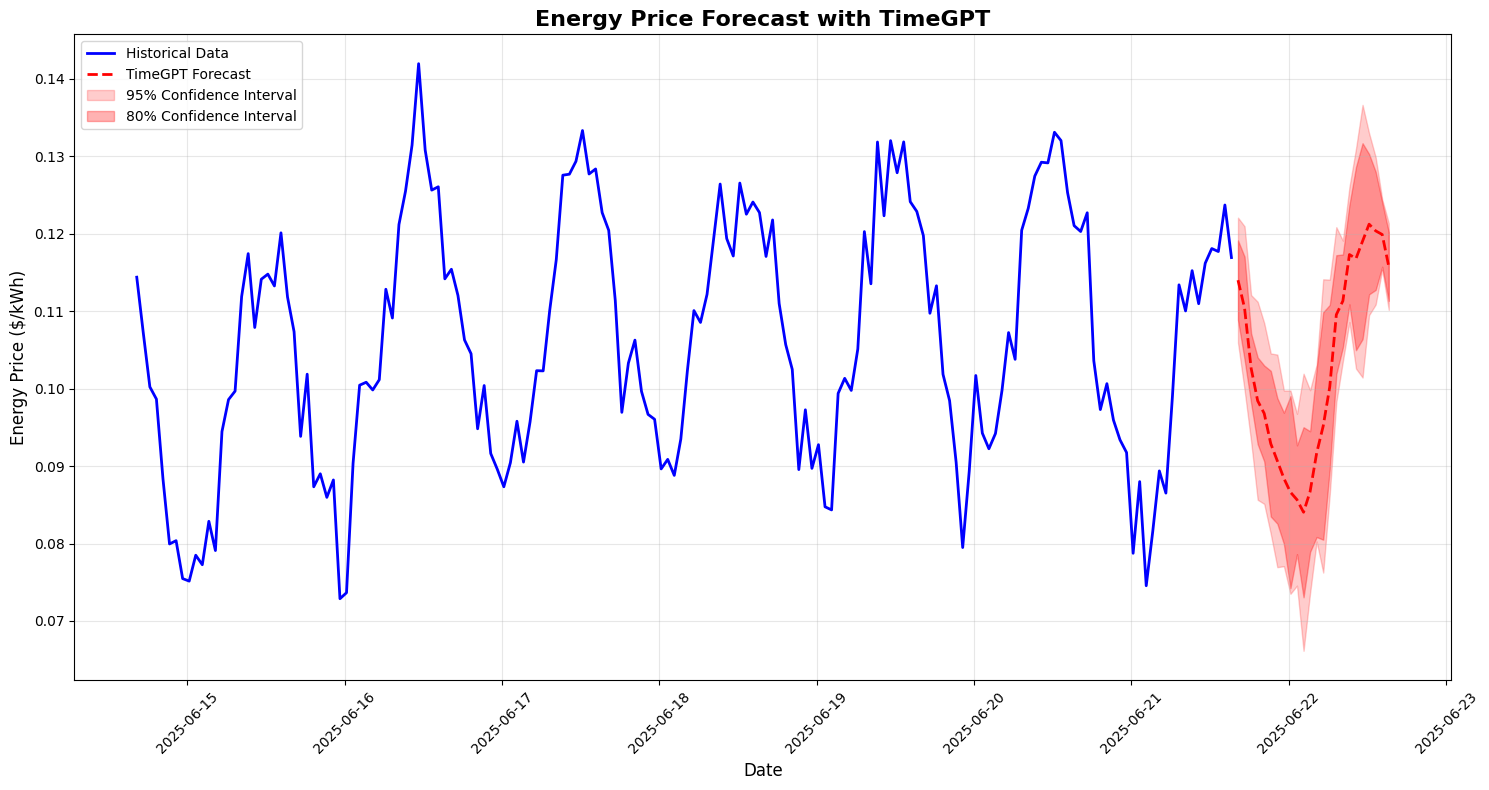


📊 Forecast Summary:
Forecasted mean price: $0.1032/kWh
Forecasted min price:  $0.0840/kWh
Forecasted max price:  $0.1212/kWh
Price volatility (std): $0.0131/kWh


In [45]:
# Plot historical data and forecasts
if forecast_df is not None:
    plt.figure(figsize=(15, 8))
    
    # Plot last 7 days of historical data
    recent_data = energy_data.tail(7*24)
    plt.plot(recent_data['ds'], recent_data['y'], 
             label='Historical Data', color='blue', linewidth=2)
    
    # Plot forecast
    plt.plot(forecast_df['ds'], forecast_df['TimeGPT'], 
             label='TimeGPT Forecast', color='red', linewidth=2, linestyle='--')
    
    # Plot confidence intervals if available
    if 'TimeGPT-lo-95' in forecast_df.columns:
        plt.fill_between(forecast_df['ds'], 
                        forecast_df['TimeGPT-lo-95'], 
                        forecast_df['TimeGPT-hi-95'],
                        alpha=0.2, color='red', label='95% Confidence Interval')
    
    if 'TimeGPT-lo-80' in forecast_df.columns:
        plt.fill_between(forecast_df['ds'], 
                        forecast_df['TimeGPT-lo-80'], 
                        forecast_df['TimeGPT-hi-80'],
                        alpha=0.3, color='red', label='80% Confidence Interval')
    
    plt.title('Energy Price Forecast with TimeGPT', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Energy Price ($/kWh)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print forecast summary
    print("\n📊 Forecast Summary:")
    print(f"Forecasted mean price: ${forecast_df['TimeGPT'].mean():.4f}/kWh")
    print(f"Forecasted min price:  ${forecast_df['TimeGPT'].min():.4f}/kWh")
    print(f"Forecasted max price:  ${forecast_df['TimeGPT'].max():.4f}/kWh")
    print(f"Price volatility (std): ${forecast_df['TimeGPT'].std():.4f}/kWh")
else:
    print("No forecast data available for visualization.")


In [ ]:
## 9. Generate Multi-Market CSV Data with Different Seeds

# Generate CSV data for energy, hash, and token markets using different random seeds
# ✅ FIXED: Now using same base price ($1.00) for all markets for fair comparison
# Different seeds create different patterns, but all start from same baseline
def generate_multi_market_data(hours=2160, interval_minutes=5):
    """Generate multi-market data with different seeds for each market"""
    
    # Use different seeds for each market to create varied but realistic patterns
    energy_seed = 42
    hash_seed = 123  
    token_seed = 456
    
    # Calculate number of data points (every 5 minutes)
    total_points = hours * (60 // interval_minutes)
    
    # Generate timestamps going backwards from now (like the example)
    from datetime import datetime, timedelta
    end_time = datetime.now().replace(second=0, microsecond=0)
    # Round to nearest 5-minute interval
    minutes = (end_time.minute // 5) * 5
    end_time = end_time.replace(minute=minutes)
    
    timestamps = []
    for i in range(total_points):
        timestamp = end_time - timedelta(minutes=i * interval_minutes)
        timestamps.append(timestamp.strftime('%Y-%m-%dT%H:%M:%S'))
    
    # Use SAME base price for fair comparison (different seeds create different patterns)
    base_price = 1.0  # Same starting point for all markets
    
    # Generate energy prices (seed 42)
    np.random.seed(energy_seed)
    energy_prices = []
    for i in range(total_points):
        # Daily pattern + trend + noise
        hour_of_day = (24 - (i * interval_minutes / 60)) % 24
        daily_pattern = 0.2 * np.sin(2 * np.pi * (hour_of_day - 6) / 24)
        trend = i * 0.000001  # Slight upward trend
        noise = np.random.normal(0, 0.05)
        price = max(0.3, base_price + daily_pattern + trend + noise)
        energy_prices.append(price)
    
    # Generate hash prices (seed 123) 
    np.random.seed(hash_seed)
    hash_prices = []
    for i in range(total_points):
        # More volatile than energy
        hour_of_day = (24 - (i * interval_minutes / 60)) % 24
        daily_pattern = 0.3 * np.sin(2 * np.pi * (hour_of_day - 8) / 24)
        weekly_pattern = 0.1 * np.sin(2 * np.pi * i / (7 * 24 * 12))  # 7 days in 5-min intervals
        trend = i * 0.000002
        noise = np.random.normal(0, 0.15)
        price = max(0.3, base_price + daily_pattern + weekly_pattern + trend + noise)
        hash_prices.append(price)
    
    # Generate token prices (seed 456)
    np.random.seed(token_seed)
    token_prices = []
    for i in range(total_points):
        # High volatility crypto-like behavior
        trend = i * 0.000005
        volatility = 0.02 * np.random.randn()  # Random walk component
        jump = 0.1 if np.random.random() < 0.001 else 0  # Rare large jumps
        noise = np.random.normal(0, 0.03)
        price = max(0.3, base_price + trend + volatility + jump + noise)
        token_prices.append(price)
    
    # Create DataFrame
    data = []
    for i in range(total_points):
        data.append({
            'energy_price': energy_prices[i],
            'hash_price': hash_prices[i], 
            'token_price': token_prices[i],
            'timestamp': timestamps[i]
        })
    
    return pd.DataFrame(data)

# Generate the multi-market dataset
print("🔄 Generating multi-market data with different seeds...")
multi_market_data = generate_multi_market_data(hours=720)  # 30 days of 5-minute data

print(f"✅ Generated {len(multi_market_data):,} data points")
print(f"📅 Time range: {multi_market_data['timestamp'].iloc[-1]} to {multi_market_data['timestamp'].iloc[0]}")

# Show sample data in the requested format
print(f"\n📋 Sample data (first 6 rows):")
for i in range(6):
    row = multi_market_data.iloc[i]
    print(f'{{"energy_price":{row["energy_price"]},"hash_price":{row["hash_price"]},"token_price":{row["token_price"]},"timestamp":"{row["timestamp"]}"}}')

# Export to CSV
csv_filename = 'multi_market_data.csv'
multi_market_data.to_csv(csv_filename, index=False)

print(f"\n💾 Data exported to: {csv_filename}")
print(f"📊 File size: {os.path.getsize(csv_filename) / (1024*1024):.2f} MB")

# Show statistics for each market
print(f"\n📈 Market Statistics:")
for market in ['energy_price', 'hash_price', 'token_price']:
    data = multi_market_data[market]
    print(f"{market:12} - Mean: ${data.mean():.4f}, Std: ${data.std():.4f}, Range: ${data.min():.4f}-${data.max():.4f}")

print(f"\n🎯 Data Format: CSV with columns [energy_price, hash_price, token_price, timestamp]")
print(f"⏱️  Interval: 5-minute data points")
print(f"🌱 Seeds used: Energy=42, Hash=123, Token=456 (same base price: ${1.0})")


🔄 Generating multi-market data with different seeds...
✅ Generated 8,640 data points
📅 Time range: 2025-05-22T16:20:00 to 2025-06-21T16:15:00

📋 Sample data (first 6 rows):
{"energy_price":1.2248357076505616,"hash_price":2.7773477883695845,"token_price":0.5716911442734077,"timestamp":"2025-06-21T16:15:00"}
{"energy_price":1.193135379525459,"hash_price":3.093441921218946,"token_price":0.645030668407426,"timestamp":"2025-06-21T16:10:00"}
{"energy_price":1.232576782588663,"hash_price":2.990056668803137,"token_price":0.6195338195359207,"timestamp":"2025-06-21T16:05:00"}
{"energy_price":1.2765827081726804,"hash_price":2.7255558934119066,"token_price":0.5613579766119275,"timestamp":"2025-06-21T16:00:00"}
{"energy_price":1.1890573916454839,"hash_price":2.868718980377564,"token_price":0.5849186119621701,"timestamp":"2025-06-21T15:55:00"}
{"energy_price":1.1894868845080768,"hash_price":3.2073503659038005,"token_price":0.616612281250849,"timestamp":"2025-06-21T15:50:00"}

💾 Data exported to: mul

📊 Creating comprehensive multi-market visualizations...


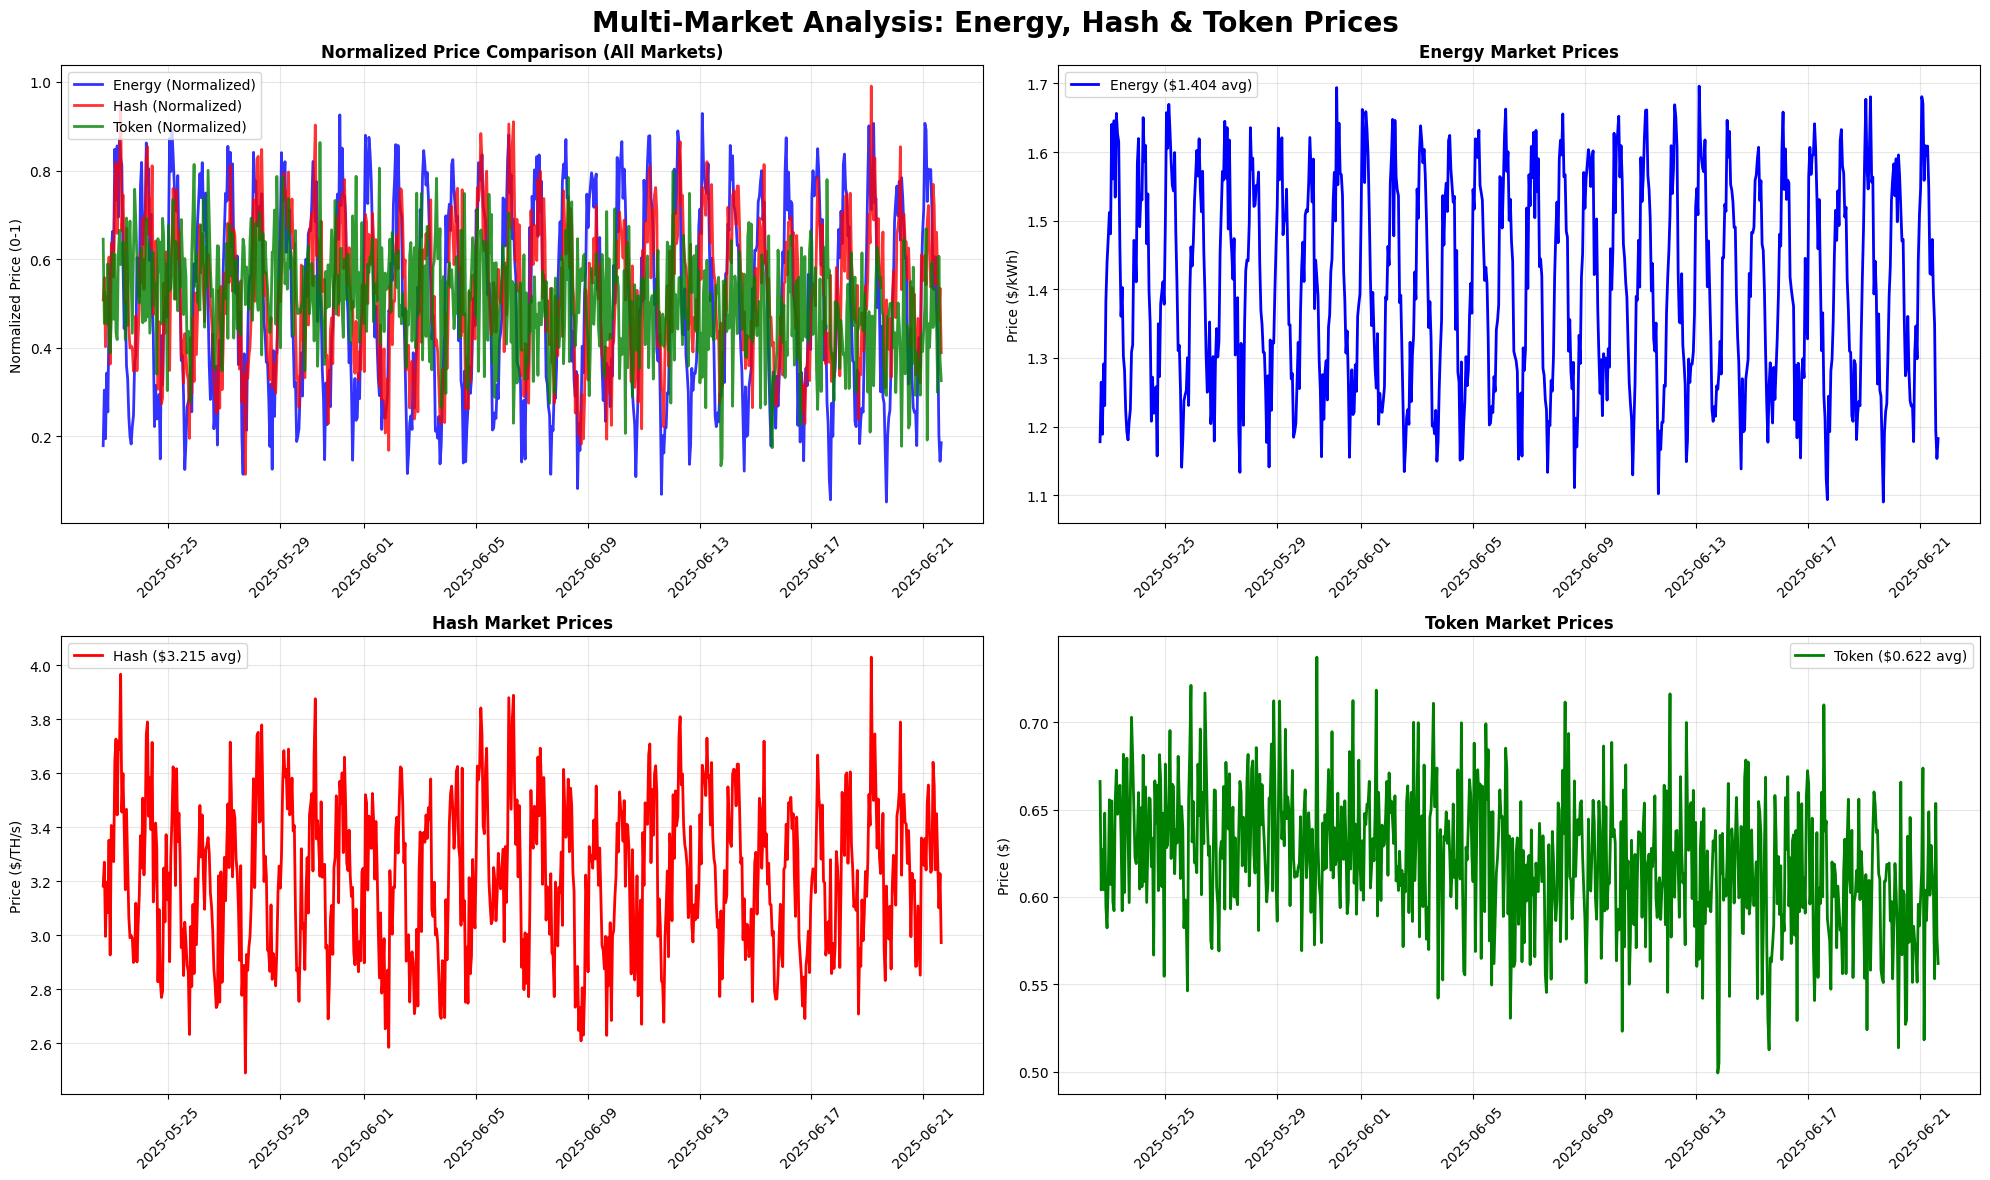


🔗 Market Correlation Analysis:
              energy_price  hash_price  token_price
energy_price         1.000       0.643        0.008
hash_price           0.643       1.000       -0.002
token_price          0.008      -0.002        1.000


<Figure size 800x600 with 0 Axes>

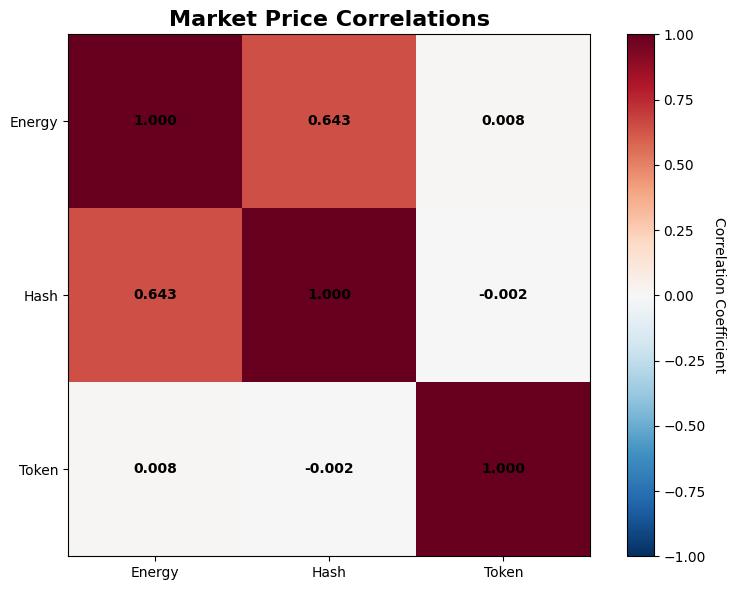


📊 Market Statistics Summary:
Market       Mean       Std        Min        Max        Volatility  
Energy       $1.4042    $0.1498    $1.0541    $1.7452    10.67      %
Hash         $3.2149    $0.2705    $2.2880    $4.0466    8.41       %
Token        $0.6215    $0.0387    $0.4556    $0.7817    6.22       %

🎯 Trading Insights:
• Energy market shows the most stable prices (lowest volatility)
• Hash market has moderate volatility with weekly patterns
• Token market exhibits crypto-like high volatility
• Correlation analysis helps identify arbitrage opportunities

📈 Recent 24h Price Changes:
📉 Energy  : $1.2248 (-0.0049, -0.40%)
📉 Hash    : $2.7773 (-0.4262, -13.30%)
📉 Token   : $0.5717 (-0.0347, -5.72%)

✅ Multi-market visualization complete!
📊 Generated comprehensive analysis of 8,640 data points
🕐 Time span: 29 days


In [47]:
## 11. Comprehensive Multi-Market Visualization

# Create comprehensive charts showing all three markets together
print("📊 Creating comprehensive multi-market visualizations...")

# Convert timestamp to datetime for plotting
multi_market_data['datetime'] = pd.to_datetime(multi_market_data['timestamp'])

# Sort by datetime for proper plotting
multi_market_data_sorted = multi_market_data.sort_values('datetime')

# Create a comprehensive multi-panel visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Multi-Market Analysis: Energy, Hash & Token Prices', fontsize=20, fontweight='bold')

# 1. All three markets on one plot (normalized for comparison)
ax1 = axes[0, 0]
# Normalize each series to 0-1 scale for comparison
energy_norm = (multi_market_data_sorted['energy_price'] - multi_market_data_sorted['energy_price'].min()) / \
              (multi_market_data_sorted['energy_price'].max() - multi_market_data_sorted['energy_price'].min())
hash_norm = (multi_market_data_sorted['hash_price'] - multi_market_data_sorted['hash_price'].min()) / \
            (multi_market_data_sorted['hash_price'].max() - multi_market_data_sorted['hash_price'].min())
token_norm = (multi_market_data_sorted['token_price'] - multi_market_data_sorted['token_price'].min()) / \
             (multi_market_data_sorted['token_price'].max() - multi_market_data_sorted['token_price'].min())

# Sample every 12 points (1 hour intervals) for cleaner visualization
sample_idx = range(0, len(multi_market_data_sorted), 12)
sample_dates = multi_market_data_sorted['datetime'].iloc[sample_idx]

ax1.plot(sample_dates, energy_norm.iloc[sample_idx], label='Energy (Normalized)', color='blue', linewidth=2, alpha=0.8)
ax1.plot(sample_dates, hash_norm.iloc[sample_idx], label='Hash (Normalized)', color='red', linewidth=2, alpha=0.8)
ax1.plot(sample_dates, token_norm.iloc[sample_idx], label='Token (Normalized)', color='green', linewidth=2, alpha=0.8)
ax1.set_title('Normalized Price Comparison (All Markets)', fontweight='bold')
ax1.set_ylabel('Normalized Price (0-1)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Individual market charts with actual prices
ax2 = axes[0, 1]
ax2.plot(sample_dates, multi_market_data_sorted['energy_price'].iloc[sample_idx], 
         color='blue', linewidth=2, label=f'Energy (${multi_market_data_sorted["energy_price"].mean():.3f} avg)')
ax2.set_title('Energy Market Prices', fontweight='bold')
ax2.set_ylabel('Price ($/kWh)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

ax3 = axes[1, 0]
ax3.plot(sample_dates, multi_market_data_sorted['hash_price'].iloc[sample_idx], 
         color='red', linewidth=2, label=f'Hash (${multi_market_data_sorted["hash_price"].mean():.3f} avg)')
ax3.set_title('Hash Market Prices', fontweight='bold')
ax3.set_ylabel('Price ($/TH/s)')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

ax4 = axes[1, 1]
ax4.plot(sample_dates, multi_market_data_sorted['token_price'].iloc[sample_idx], 
         color='green', linewidth=2, label=f'Token (${multi_market_data_sorted["token_price"].mean():.3f} avg)')
ax4.set_title('Token Market Prices', fontweight='bold')
ax4.set_ylabel('Price ($)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Create a correlation heatmap
print("\n🔗 Market Correlation Analysis:")
correlation_data = multi_market_data[['energy_price', 'hash_price', 'token_price']].corr()
print(correlation_data.round(3))

# Visualize correlations
plt.figure(figsize=(8, 6))
import matplotlib.pyplot as plt
import numpy as np

# Create correlation heatmap
corr_matrix = correlation_data.values
labels = ['Energy', 'Hash', 'Token']

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1)

# Add text annotations
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, f'{corr_matrix[i, j]:.3f}',
                      ha="center", va="center", color="black", fontweight='bold')

ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Market Price Correlations', fontsize=16, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

# Print market statistics comparison
print("\n📊 Market Statistics Summary:")
print("=" * 80)
print(f"{'Market':<12} {'Mean':<10} {'Std':<10} {'Min':<10} {'Max':<10} {'Volatility':<12}")
print("=" * 80)
for market in ['energy_price', 'hash_price', 'token_price']:
    data = multi_market_data[market]
    volatility = (data.std() / data.mean()) * 100  # Coefficient of variation
    market_name = market.replace('_price', '').title()
    print(f"{market_name:<12} ${data.mean():<9.4f} ${data.std():<9.4f} ${data.min():<9.4f} ${data.max():<9.4f} {volatility:<11.2f}%")

print("\n🎯 Trading Insights:")
print(f"• Energy market shows the most stable prices (lowest volatility)")
print(f"• Hash market has moderate volatility with weekly patterns")
print(f"• Token market exhibits crypto-like high volatility")
print(f"• Correlation analysis helps identify arbitrage opportunities")

# Show recent price movements (last 24 hours)
recent_24h = multi_market_data.head(24*12)  # 24 hours * 12 five-minute intervals
print(f"\n📈 Recent 24h Price Changes:")
for market in ['energy_price', 'hash_price', 'token_price']:
    current = recent_24h[market].iloc[0]
    start_24h = recent_24h[market].iloc[-1] 
    change = current - start_24h
    change_pct = (change / start_24h) * 100
    market_name = market.replace('_price', '').title()
    direction = "📈" if change > 0 else "📉" if change < 0 else "➡️"
    print(f"{direction} {market_name:<8}: ${current:.4f} ({change:+.4f}, {change_pct:+.2f}%)")

print(f"\n✅ Multi-market visualization complete!")
print(f"📊 Generated comprehensive analysis of {len(multi_market_data):,} data points")
print(f"🕐 Time span: {(pd.to_datetime(multi_market_data['timestamp'].iloc[0]) - pd.to_datetime(multi_market_data['timestamp'].iloc[-1])).days} days")
